<a href="https://colab.research.google.com/github/CJTAYL/.github.io/blob/main/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Casting a Wider Net: Re-analysis of FiveThirtyEight Data



Analysis of data used by FiveThirtyEight to discuss how a South Carolina commmunity prepared for COVID-19. 

The data were retrieved from FiveThirtyEight's GitHub repository.

Link to the original article is provided below.

https://fivethirtyeight.com/features/how-one-high-risk-community-in-rural-south-carolina-is-bracing-for-covid-19/

In [10]:
# Packages used
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import io

# Set dots per inch for visualizations
plt.rcParams["figure.dpi"] = 300

# URL for raw data from FiveThirtyEight GitHub Repository
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/covid-geography/mmsa-icu-beds.csv"

# Code to download data from URL
download = requests.get(url).content

In [11]:
# Data frame from downloaded CSV
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Filtering Data
df_filtered = df.loc[(df['total_percent_at_risk'] > '60.00') & (df['high_risk_per_ICU_bed'] > 3000) & (df['hospitals'] < 10) & (df['total_at_risk'] > 100000)]
df_sorted = df_filtered.sort_values(by=['high_risk_per_ICU_bed'], ascending = False)

# Cleaning and Re-organizing Data
df_sorted.insert(1, "abbv", ["HH", "SP", "SA", "AB", "PO"], True)
df_sorted.insert(2, "high_risk_percent", [62.72, 66.12, 68.32, 60.33, 60.60], True)

# Removing re-formatted column 
del df_sorted['total_percent_at_risk']

In [28]:
df_sorted

,MMSA,abbv,high_risk_percent,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk
2,"Hilton Head Island-Bluffton-Beaufort, SC",HH,62.72,3904.163571,36438.86000,28.0,3.0,109316.58
4,"Spartanburg, SC",SP,66.12,3786.115556,85187.60000,45.0,2.0,170375.20
7,"Salisbury, MD-DE",SA,68.32,3292.271176,37312.40667,68.0,6.0,223874.44
11,"Albuquerque, NM",AB,60.33,3091.331014,71100.61333,138.0,6.0,426603.68
12,"Portland-South Portland, ME",PO,60.60,3051.228953,43734.28167,86.0,6.0,262405.69


(100000.0, 500000.0)

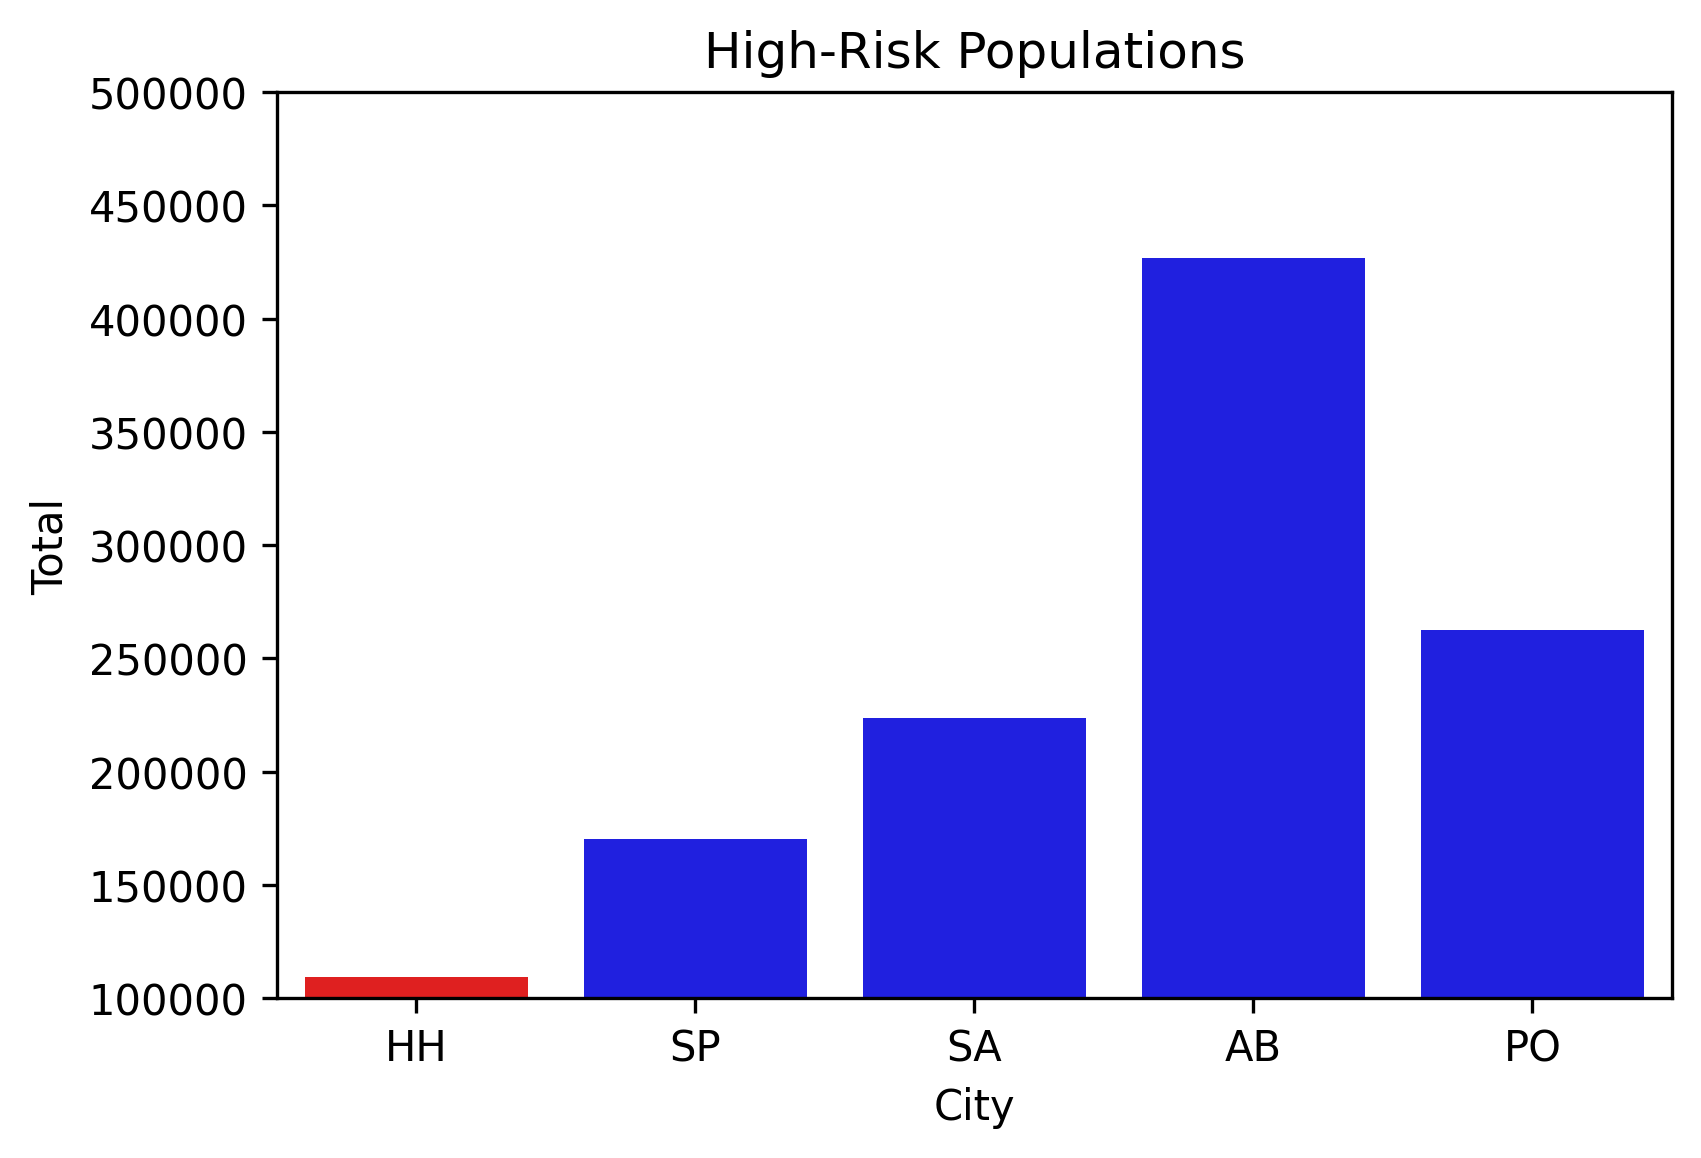

In [25]:
# Color palette for bar plot
palette = {"HH": "red", "SP": "blue", "SA": "blue", "AB": "blue", "PO": "blue"}

# Visualization for high risk populations across cities
sns.barplot(x='abbv', y='total_at_risk', palette=palette, data=df_sorted)
plt.ylabel("Total")
plt.title("High-Risk Populations")
plt.xlabel("City")
plt.ylim(100000, 500000)


Text(0.5, 0, 'City')

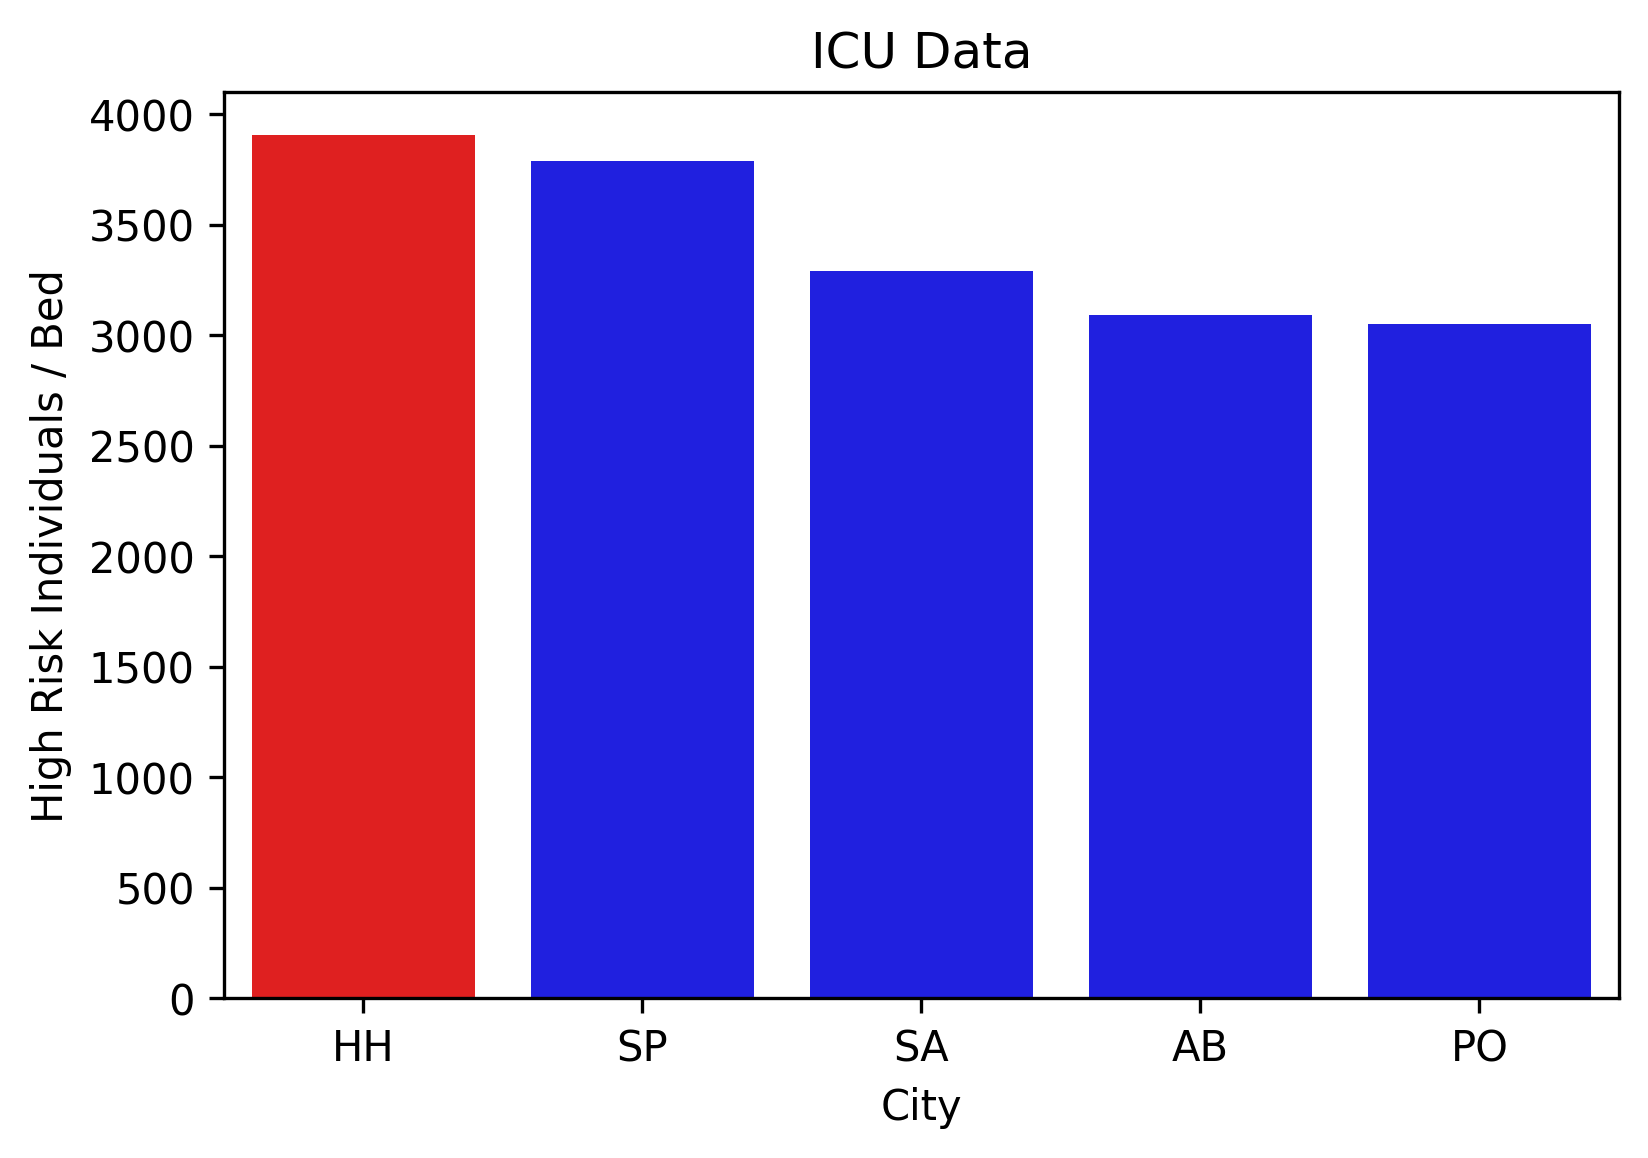

In [26]:
# Visualization for ICU Bed Data
sns.barplot(x='abbv', y='high_risk_per_ICU_bed', palette=palette, data=df_sorted)
plt.ylabel("High Risk Individuals / Bed")
plt.title("ICU Data")
plt.xlabel("City")

Text(0.5, 0, 'City')

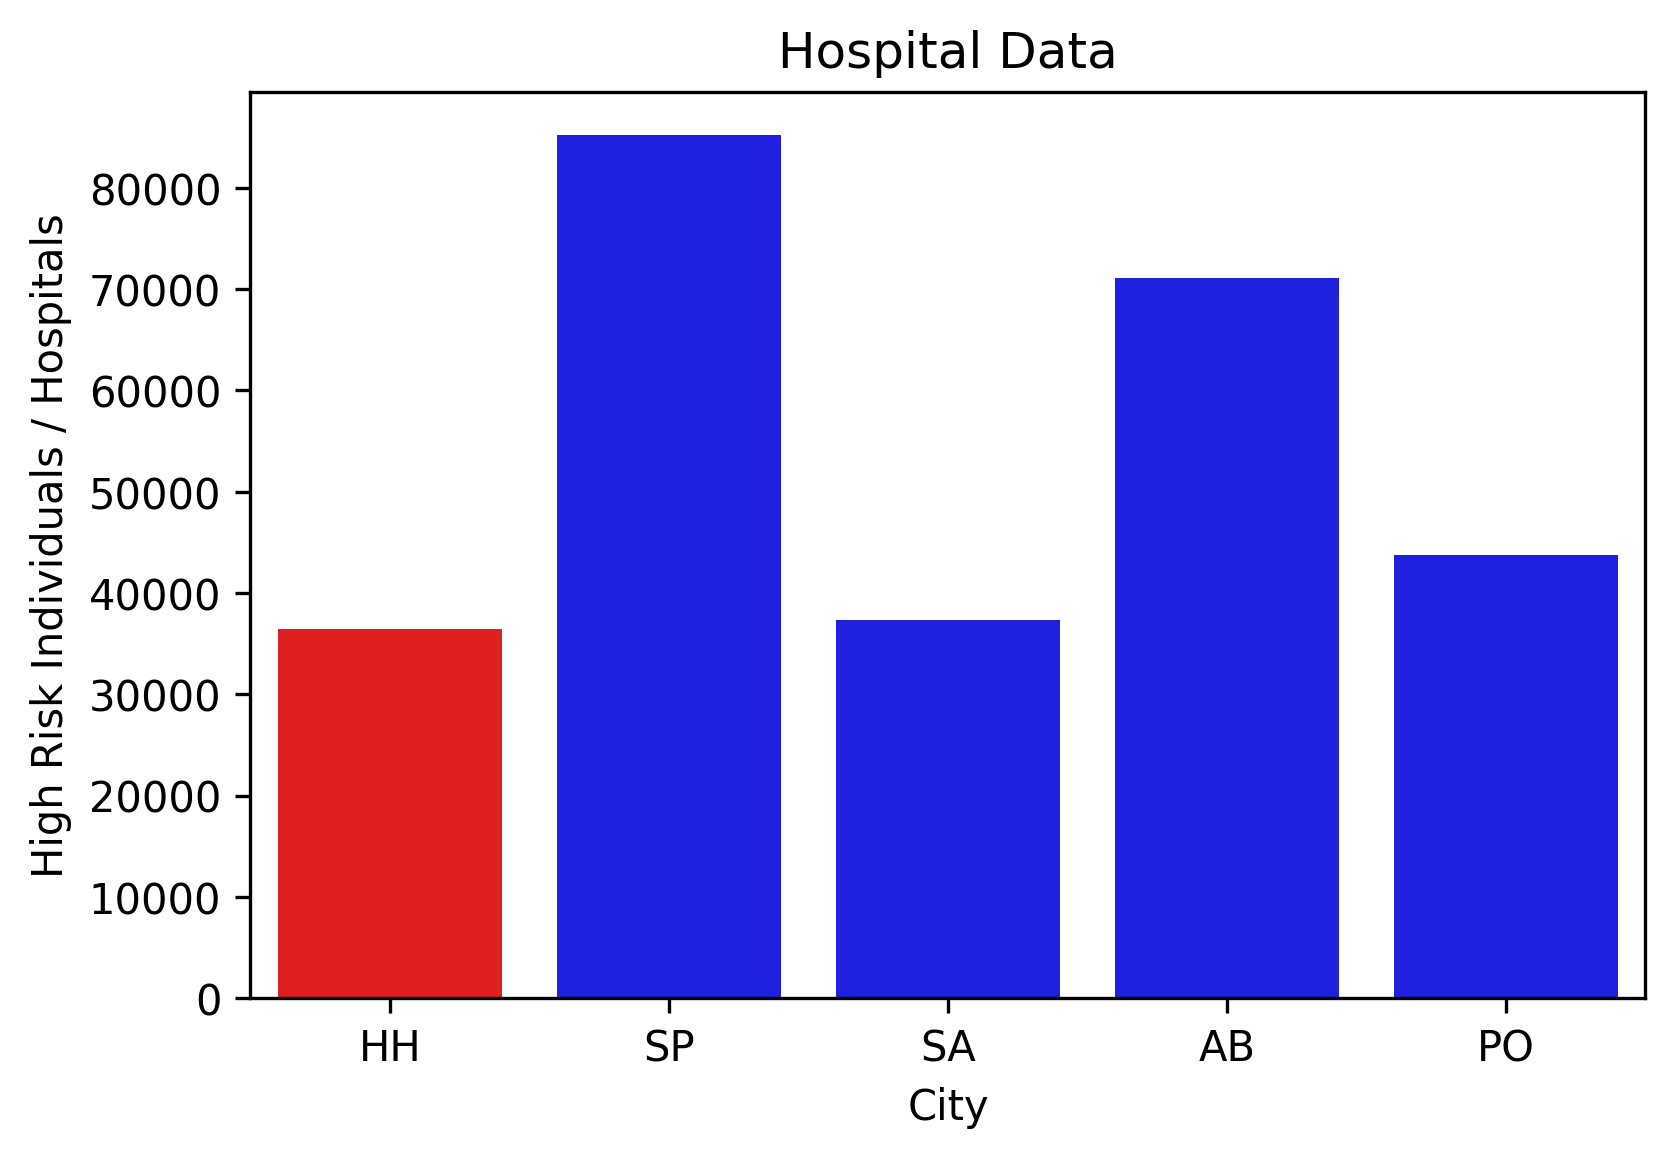

In [27]:
# Visualization for Hospital Data
sns.barplot(x='abbv', y='high_risk_per_hospital', palette=palette, data=df_sorted)
plt.ylabel("High Risk Individuals / Hospitals")
plt.title("Hospital Data")
plt.xlabel("City")